### Problem 2 – Ensemble learning (35%)
Using the nutrition dataset included in HW2 / Problem 3, develop a classification model based on bagged classification trees.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
#read in training data
train_features = pd.read_csv('x1.csv', header=None)
train_classes = pd.read_csv('c1.csv', header=None)

#read in validation set
val_features = pd.read_csv('x2.csv', header=None)
val_classes = pd.read_csv('c2.csv', header=None)

#read in test set, classes are not provided
test_features = pd.read_csv('x3.csv', header=None)

In [3]:
#all 46 feats
feat = ["Water", "Food energy", "Protein", "Total lipids", "Ash", "Carbohydrate", "Total Dietary Fiber", "Total Sugars", "Calcium", "Iron", "Magnesium", "Phosphorus", "Potassium", "Sodium", "Zinc", "Copper", "Manganese", "Selenium", "Vitamin C", "Thiamin", "Riboflavin", "Niacin", "Pantothenic acid", "Vitamin B-6", "Total Folate", "Folic acid", "Food folate", "Folate", "Vitamin B-12", "Vitamin A", "VitA","Retinol", "Vitamin E", "Vitamin K","Alpha-Carotene", "Beta-Carotene","Beta-Cryptoxanthin","Lycopene","Lutein + Zeazanthin",  "Saturated fatty acids", "Monounsaturated fatty acids", "Polyunsaturated fatty acids", "Cholesterol", "1st household weight", "2nd household weight", "Percent refuse"]

##### 15% credit. Train a bagged tree model with 50 trees using the training data (x1). 

Estimate OOB performance as a function of the number of trees grown. Discuss your findings.

Referenced: 
- https://www.geeksforgeeks.org/oob-errors-for-random-forests-in-scikit-learn/
- https://stackoverflow.com/questions/44333573/feature-importances-bagging-scikit-learn

In [4]:

# Initialize an empty list to store OOB scores
oob_scores = []

# Define the number of trees to grow
num_trees_list = list(range(1, 51))

for num_trees in num_trees_list:
    # Create a decision tree classifier
    tree_classifier = DecisionTreeClassifier()

    # Create a bagged tree model with the specified number of trees
    bagged_tree_model = BaggingClassifier(base_estimator=tree_classifier, n_estimators=num_trees, oob_score=True, random_state=42)

    # Train the model
    bagged_tree_model.fit(train_features, train_classes.values.ravel())

    # Append the OOB score to the list
    oob_scores.append(bagged_tree_model.oob_score_)


c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\s

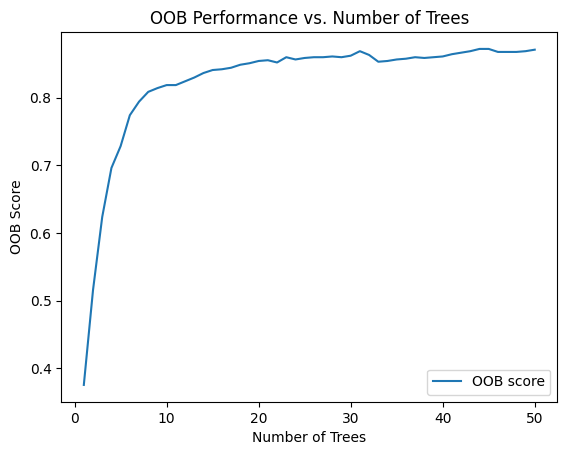

In [5]:
# Plot the OOB scores as a function of the number of trees
plt.plot(num_trees_list, oob_scores, label='OOB score')
plt.legend(loc = 4)
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')
plt.title('OOB Performance vs. Number of Trees')
plt.show()

##### 10 % credit. Generate a variable importance plot for the model you developed in part (a). 
Interpret the results –this will require you to do some research on the meaning of the various predictors for different food categories.

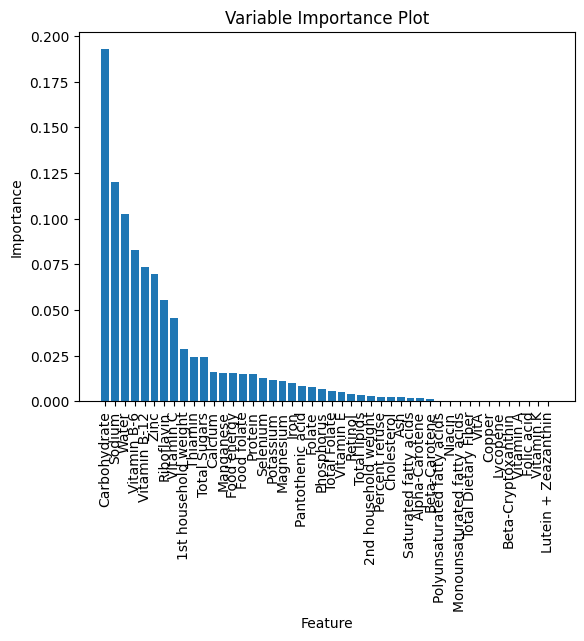

In [6]:
# Assuming bagged_tree_model is already trained in the previous code

# Get feature importances from one of the base estimators (assuming they're similar for all trees)
feature_importances = bagged_tree_model.estimators_[0].feature_importances_

# Get the indices of the features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the variable importance
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), [feat[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Variable Importance Plot')
plt.show()


##### 10% credit. Train a sequence of bagged tree models with increasing numbers of trees (from 1 to 50). 
Estimate model performance on the test set (x2). Compare your results against the OOB results in part (a). Discuss your findings.


In [7]:
from sklearn.metrics import accuracy_score

# Assuming you have test_features and test_classes

# Initialize lists to store test accuracies and OOB scores
test_accuracies = []
oob_scores = []

# Define the number of trees to grow
num_trees_list = list(range(1, 51))

for num_trees in num_trees_list:
    # Create a decision tree classifier
    tree_classifier = DecisionTreeClassifier()

    # Create a bagged tree model with the specified number of trees
    bagged_tree_model = BaggingClassifier(base_estimator=tree_classifier, n_estimators=num_trees, oob_score=True, random_state=42)

    # Train the model
    bagged_tree_model.fit(train_features, train_classes.values.ravel())

    # Evaluate on the test set
    test_predictions = bagged_tree_model.predict(val_features)
    test_accuracy = accuracy_score(val_classes.values.ravel(), test_predictions)
    test_accuracies.append(test_accuracy)

    # Append the OOB score to the list
    oob_scores.append(bagged_tree_model.oob_score_)




c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\s

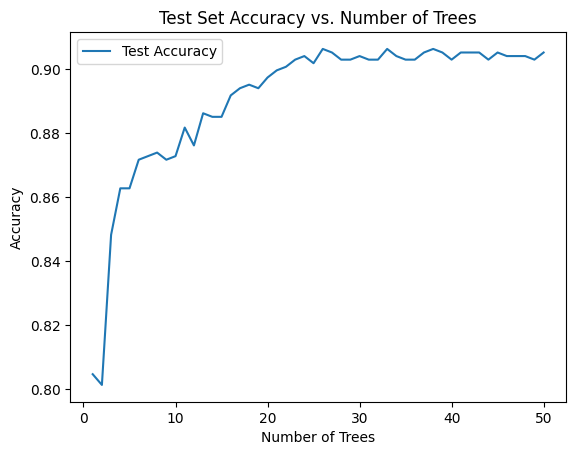

In [8]:
plt.plot(num_trees_list, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Test Set Accuracy vs. Number of Trees')
plt.legend()

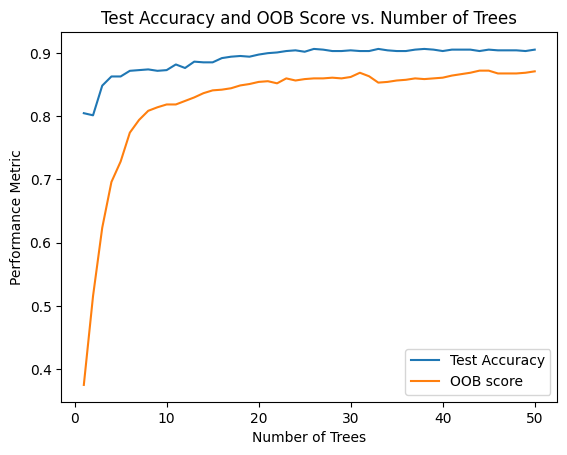

In [9]:
# Plot the test accuracies and OOB scores as a function of the number of trees
plt.plot(num_trees_list, test_accuracies, label='Test Accuracy')
plt.plot(num_trees_list, oob_scores, label='OOB score')
plt.xlabel('Number of Trees')
plt.ylabel('Performance Metric')
plt.title('Test Accuracy and OOB Score vs. Number of Trees')
plt.legend()
plt.show()

## Extra observations: Random Forest

In [10]:
trees = list(range(1, 51))

oob_errors = []
errors = []
for i in trees:
    reg = RandomForestRegressor(n_estimators=i,oob_score=True, random_state=0).fit(train_features, train_classes.values.ravel())
    # Obtain the OOB error 
    oob_errors.append(reg.oob_score_)
    errors.append(reg.score(val_features, val_classes.values.ravel()))

c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\lan\AppData\Loc

In [11]:
#variable importance plot
#use the last model with 50 trees
importances = reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

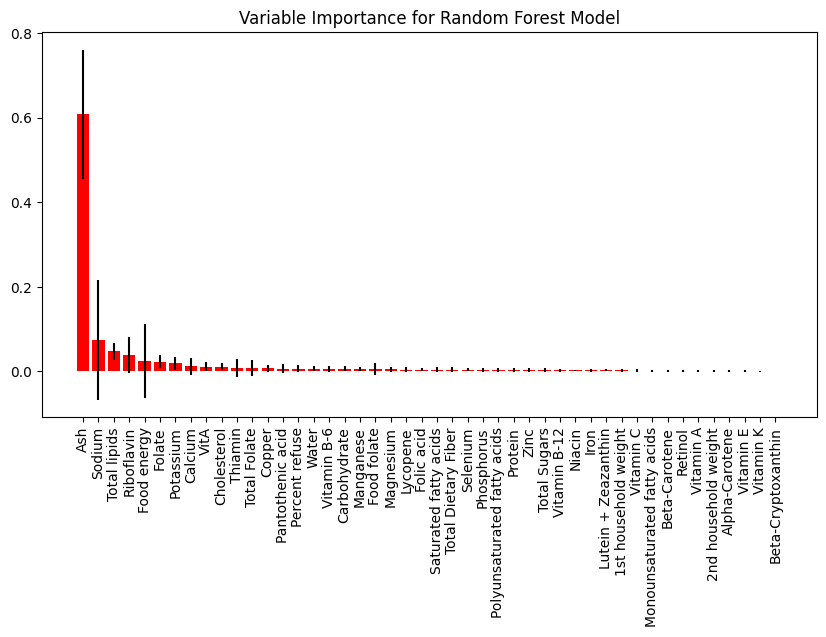

In [12]:
plt.figure(figsize=(10, 5))
plt.title("Variable Importance for Random Forest Model")
plt.bar(range(train_features.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), [feat[i - 1] for i in indices], rotation=90)
# plt.xticks(range(train_features.shape[1]), indices)
plt.show()

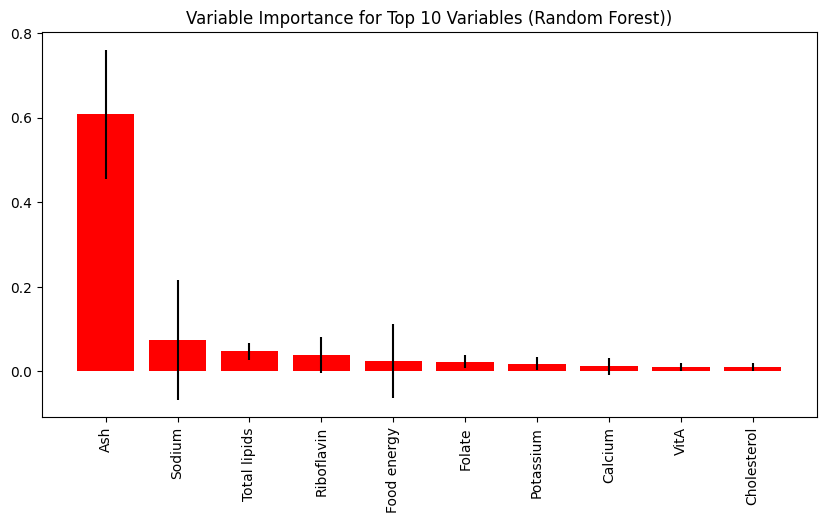

In [13]:
# #lets plot the top 10 variables, with correct labels
plt.figure(figsize=(10, 5))
plt.title("Variable Importance for Top 10 Variables (Random Forest))")
plt.bar(range(10), importances[indices[:10]], color="r", yerr=std[indices[:10]], align="center")
#put the correct labels
plt.xticks(range(10), [feat[i - 1] for i in indices[:10]], rotation=90)
plt.show()


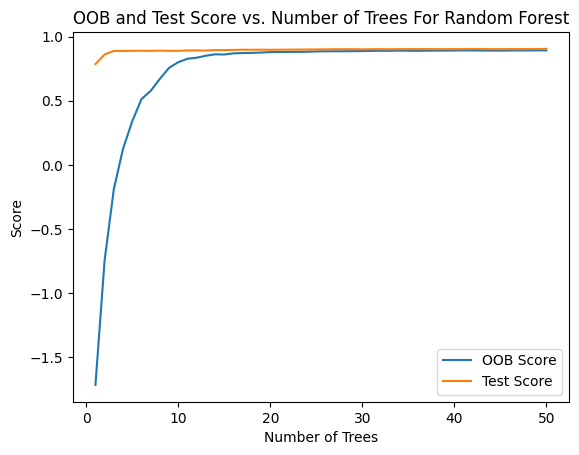

In [14]:
#plot the OOB error
plt.plot(trees, oob_errors, label='OOB Score')
plt.plot(trees, errors, label='Test Score')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('OOB and Test Score vs. Number of Trees For Random Forest')
plt.legend()